# Data analysis and preprocessing

In [1]:
import pandas as pd
import numpy as np
import re
import string
import operator
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/all.csv')
df.describe()

,author,content,poem name,age,type
count,573,573,571,573,573
unique,67,506,508,2,3
top,WILLIAM SHAKESPEARE,"Originally published in Poetry, March 1914.",Canto IV,Renaissance,Love
freq,71,4,3,315,326


First five instances of our data:

In [3]:
df.head()

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\nOn the sole Arabi...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\nWhen I...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\nAn...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\nA...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\nStil...",Sonnet 16,Renaissance,Mythology & Folklore


Unique values of variable age:

In [4]:
df['age'].unique()

array(['Renaissance', 'Modern'], dtype=object)

Unique values of variable type:

In [5]:
df['type'].unique()

array(['Mythology & Folklore', 'Nature', 'Love'], dtype=object)

## Data analysis

Atributes with missing values:

In [6]:
df.isnull().sum()

author       0
content      0
poem name    2
age          0
type         0
dtype: int64

In this project, age and type will be our target variables, so lets take a look into categories we have.

<ipython-input-7-b390ffb57c36>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


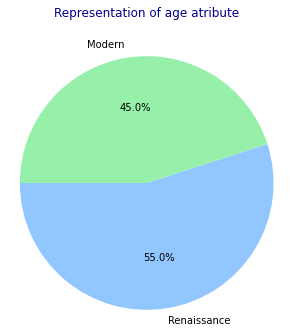

<ipython-input-7-b390ffb57c36>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


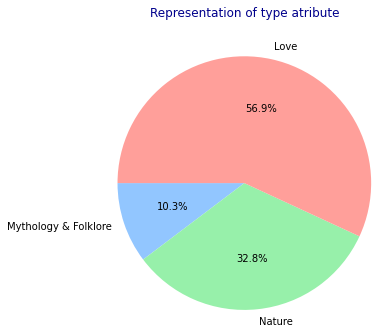

<ipython-input-7-b390ffb57c36>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


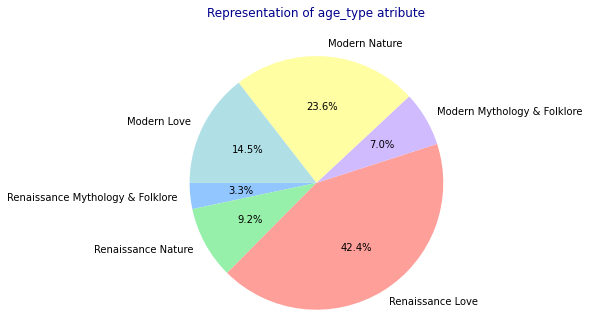

In [7]:
df['age_type'] = [df['age'][i] +" "+ df['type'][i] for i in range(len(df['age']))]

for param in ['age', 'type', 'age_type']:
    counted = []
    unique = df[param].unique()
    for u in unique:
        counted.append(operator.countOf(df[param], u))
    
    plt.style.use('seaborn-pastel')
    fig1, ax1 = plt.subplots(figsize=(5,5), facecolor='white')
    ax1.pie(counted, labels=unique, autopct='%1.1f%%', startangle=180)
    ax1.axis('equal')
    plt.title("Representation of " + param + " atribute", pad=30, color='darkblue')
    plt.show()

## Preprocessing

First of all, we are simplifying texts we have.

In [8]:
# nltk.download('stopwords')

In [9]:
#function copied from internet
def simplifyText(x):
    x = x.lower()
    x = re.sub(r'[^\x00-\x7f]',r' ',x)
    x = x.replace('\r','')
    x = x.replace('\n','')
    x = x.replace('  ','')
    x = x.replace('\'','')
    return re.sub("["+string.punctuation+"]", " ", x)

In [10]:
df['content'] = df['content'].map(simplifyText)
df['author'] = df['author'].map(simplifyText)
df.head()

,author,content,poem name,age,type,age_type
0,william shakespeare,let the bird of loudest layon the sole arabian...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
1,duchess of newcastle margaret cavendish,sir charles into my chamber coming in when i w...,An Epilogue to the Above,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
2,thomas bastard,our vice runs beyond all that old men saw and ...,"Book 7, Epigram 42",Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
3,edmund spenser,lo i the man whose muse whilome did maske as ...,"from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
4,richard barnfield,long have i longd to see my love againe still ...,Sonnet 16,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore


Removing stop words:

In [11]:
stopWords = stopwords.words('english')

In [12]:
df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopWords)]))
# df['content'][0]

0      let bird loudest layon sole arabian treeherald...
1      sir charles chamber coming writing fairy queen...
2      vice runs beyond old men saw far authentically...
3      lo man whose muse whilome maske time taught lo...
4      long longd see love againe still wisht never c...
                             ...                        
568    man love loves walked street lamps flare watch...
569    hart crane voyages ii iii iv v vi complete poe...
570    old grey full sleep nodding fire take book slo...
571    give hunger gods sit givethe world orders give...
572    potuia potuiawhite grave goddess pity sadness ...
Name: content, Length: 573, dtype: object

We are saving our new preprocessed dataset:

In [13]:
df.to_csv('../data/all_preprocessed.csv', index=False)

### Train/test split and TF-IDF matrix creation for casification algorithms

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df[['age', 'type', 'age_type']], train_size=0.7)

Creating TF-IDF matrix for training data:

In [15]:
tfidfVectorizer = TfidfVectorizer(stop_words = stopWords)

Fitting vectorizer only for TRAINING 

This si because our models in future will use this matrix for fitting, so we don't want any influance of test data in it.

So it would be big misstake if we wrote: tfidfVectorizer.fit(df[content])

In [16]:
tfidfVectorizer.fit(X_train)

TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

Saving train data:

In [17]:
tfidf_TrainX = tfidfVectorizer.transform(X_train)
dfTrain = pd.DataFrame(tfidf_TrainX.toarray(), columns=tfidfVectorizer.get_feature_names_out())
dfTrain.head()

,10,13,1538,19,1904,1914,1917,1921,1922,1923,...,ytorne,yvie,yvorie,yvory,zeal,zealous,zephyrs,zephyrus,zeus,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
dfTrain.to_csv('../data/train/X_train.csv', index=False)
y_train['age'].to_csv('../data/train/y_train.csv', index=False)
y_train['type'].to_csv('../data/train/y_train_type.csv', index=False)
y_train['age_type'].to_csv('../data/train/y_train_age_type.csv', index=False)

Saving test data:

In [19]:
tfidf_TestX = tfidfVectorizer.transform(X_test)
dfTest = pd.DataFrame(tfidf_TestX.toarray(), columns=tfidfVectorizer.get_feature_names_out())

In [20]:
dfTest.to_csv('../data/test/X_test.csv', index=False)
y_test['age'].to_csv('../data/test/y_test.csv', index=False)
y_test['type'].to_csv('../data/test/y_test_type.csv', index=False)
y_test['age_type'].to_csv('../data/test/y_test_age_type.csv', index=False)